We should call `.py` so that cuda memory will be automatically released after each part.

This notebook is used to organize the codes

## Setup

### What you need to do

- Throw audio files into `data/` directory

- Correctly set `input_list`

- Create a `.env` file in the `process/` directory if using `glm-4`

In [1]:
import os

In [2]:
DATA_PATH = os.getcwd() + '/data/'
MODEL_PATH = '/ssdshare/LLMs/'
MUSIC_PATH = os.getcwd() + '/data/music/'
LLM_MODEL = "glm-4"
GENRATE_MODEL = "playground-v2.5-1024px-aesthetic"
CONTENT_PATH = DATA_PATH + '.tmp/generate/'
STYLE_PATH = DATA_PATH + 'style/illustration_style/'

if not os.path.exists(DATA_PATH + '.tmp/'):
  os.makedirs(DATA_PATH + '.tmp/')

list = ['extract/', 'generate/', 'process/', 'inprompt', 'style_transfer']

for folder in list:
  if not os.path.exists(DATA_PATH + '.tmp/' + folder):
    os.makedirs(DATA_PATH + '.tmp/' + folder)


In [3]:
input_list = [
  'out.mp3',
]
prompts = [r'''

''',
]
# Pick the style images in the style library
style_list = [
  # 'opia.png'
]
num_char = 2 # default 1
num_non_char = 2 # default 1
image_num = 1 
# You should check both input_list and prompts modified!!!
with open(DATA_PATH + 'input_list.txt', 'w') as f:
  for item in input_list:
    f.write("%s\n" % item)

with open(DATA_PATH + 'style_list.txt', 'w') as f:
  for item in style_list:
    f.write("%s\n" % item)

tmp_list = []
for item in input_list:
  tmp_list.append(item[:-4])
input_list = tmp_list

# if not os.path.exists(DATA_PATH + '.tmp/inprompt/'):
#   os.makedirs(DATA_PATH + '.tmp/inprompt/')
for (prompt, name) in zip(prompts, input_list):
  with open(DATA_PATH + '.tmp/inprompt/' + name + '.prompt', 'w') as f:
    f.write(prompt)

## Extract

In [4]:
os.system(f'python extract/extract.py --model_path {MODEL_PATH} --data_path {DATA_PATH} --music_path {MUSIC_PATH} --output_path {DATA_PATH}.tmp/extract/ --device_num 2 --ignore_lyrics False')

out.mp3
['out.wav']
audio_start_id: 155163, audio_end_id: 155164, audio_pad_id: 151851.


The model is automatically converting to bf16 for faster inference. If you want to disable the automatic precision, please manually add bf16/fp16/fp32=True to "AutoModelForCausalLM.from_pretrained".
Try importing flash-attention for faster inference...
Loading checkpoint shards: 100%|██████████| 9/9 [00:03<00:00,  2.31it/s]
The model is automatically converting to bf16 for faster inference. If you want to disable the automatic precision, please manually add bf16/fp16/fp32=True to "AutoModelForCausalLM.from_pretrained".
Try importing flash-attention for faster inference...
Loading checkpoint shards: 100%|██████████| 9/9 [00:03<00:00,  2.33it/s]


using device 0
using device 1
using device 0
using device 1
using device 0
using device 1
using device 0
using device 1
using device 0
using device 1
using device 0
successfully add prompt for out.wav
This music is cut into 11 pieces. Each piece has a length of 30 seconds and an overlap of 5 seconds. The description of each piece is as follows:
Description piece 1: The song is an upbeat and energetic pop rock track. It features a catchy guitar riff, a powerful drum beat, and a catchy vocal melody. The song is about a person who is feeling down and lonely, but finds hope and happiness when they meet someone special. The lyrics are emotional and heartfelt, and the melody is uplifting and inspiring. Overall, the song is a powerful and inspiring anthem about the power of love and the importance of finding happiness in life.
Description piece 2: The song is an upbeat and energetic pop rock track. It features a catchy melody, powerful drums, and groovy bass lines. The song is about a person 

0

## Process

In [8]:
os.system(f'python process/process.py --model_path {MODEL_PATH} --data_path {DATA_PATH} --model {LLM_MODEL} --prompt_path {DATA_PATH}.tmp/extract/ --output_path {DATA_PATH}.tmp/process/ --num_char {num_char} --num_non_char {num_non_char}')

['out']
Loading model
Model loaded
<class 'zhipuai._client.ZhipuAI'> <class 'NoneType'>
16
16
1
16
Token spent: 35548


0

In [9]:
for file_name in input_list:
  for t in range(num_char):
    with open(DATA_PATH + '.tmp/process/' + file_name + '.prompt' + str(t), 'r') as f:
      print(f.read())
  for t in range(num_non_char):
    with open(DATA_PATH + '.tmp/process/' + file_name + '.prompt_nc' + str(t), 'rb') as f:
      print(f.read())

upbeat scene, young couple holding hands, smiling, sunny park, guitar, drums, vibrant colors, emotional atmosphere, broken heart, rain, umbrella, silhouette, sunset, long shadow, heart-shaped cloud, 8k resolution, 16:9 aspect ratio, 60fps
upbeat, energetic, pop rock, guitar riff, drum beat, vocal melody, emotional, heartfelt, uplifting, inspiring, power of love, happiness, nostalgia, longing, past relationship, regrets, mistakes, emotional, powerful, make things right, acoustic guitar, electric guitar, bass, rhythmic background, enthusiastic drums, high-pitched vocals, happy, carefree, summer road trip, party, friends, sadness, hope, rock ballad, electric guitar, piano, steady drums, longing, regret, moving on, breakup, determination, resilience, emotional goodbye, ex-partner, 8k resolution, 16:9 aspect ratio, 60fps
b'vibrant and colorful abstract image, blending warm tones with cool accents, multiple overlapping circles representing connections and relationships, floating ethereal sha

## Generate

In [10]:
os.system(f'python generate/generate.py --model_path {MODEL_PATH} --data_path {DATA_PATH} --model {GENRATE_MODEL} --output_path {DATA_PATH}.tmp/generate/ --prompt_path {DATA_PATH}.tmp/process/ --image_num {image_num} --num_char {num_char} --num_non_char {num_non_char}')

Loading prompt from file
out.prompt
Prompt loaded
Loading model


Loading pipeline components...: 100%|██████████| 7/7 [00:02<00:00,  3.38it/s]


Model loaded
Generating for out.prompt


100%|██████████| 50/50 [00:06<00:00,  7.51it/s]
Token indices sequence length is longer than the specified maximum sequence length for this model (132 > 77). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (132 > 77). Running this sequence through the model will result in indexing errors
100%|██████████| 50/50 [00:06<00:00,  7.76it/s]


Generated for out.prompt
Loading prompt from file
Generating image without characters
Prompt loaded
Generating for out.prompt_nc


100%|██████████| 50/50 [00:06<00:00,  7.74it/s]


Generated for out.prompt_nc


0

# Style transfer

If you don't want to keep the previous images, run the line below to remove them (so that we can show the images generated).

In [11]:
import os, glob
for file_name in input_list:
    [os.remove(f) for f in glob.glob(DATA_PATH + '.tmp/style_transfer/' + file_name + '/*')]

In [12]:
os.system(f'python style_transfer/style_transfer.py --data_path {DATA_PATH} --output_path {DATA_PATH}.tmp/style_transfer/ --style_path {STYLE_PATH} --content_path {CONTENT_PATH} -l_o --num_char {num_char} --num_non_char {num_non_char}')

Downloading: "https://download.pytorch.org/models/vgg19-dcbb9e9d.pth" to /root/.cache/torch/hub/checkpoints/vgg19-dcbb9e9d.pth
100%|██████████| 548M/548M [00:15<00:00, 37.6MB/s] 


['0-0.png', '1-0.png', 'nc0-0.png', 'nc1-0.png']
content: out/0-0.png
style: 16.png
Transferring from /root/LLM_project/codes/data/.tmp/generate/out/0-0.png to /root/LLM_project/codes/data/style/illustration_style/16.png
Building the style transfer model..


Style Loss : 0.160040 Content Loss: 0.783442:  80%|████████  | 40/50 [00:04<00:01,  9.28it/s]


Transfer from /root/LLM_project/codes/data/.tmp/generate/out/0-0.png to /root/LLM_project/codes/data/style/illustration_style/16.png done
content: out/1-0.png
style: 16.png
Transferring from /root/LLM_project/codes/data/.tmp/generate/out/1-0.png to /root/LLM_project/codes/data/style/illustration_style/16.png
Building the style transfer model..


Style Loss : 0.265663 Content Loss: 1.053154:  80%|████████  | 40/50 [00:04<00:01,  9.47it/s]


Transfer from /root/LLM_project/codes/data/.tmp/generate/out/1-0.png to /root/LLM_project/codes/data/style/illustration_style/16.png done
content: out/nc0-0.png
style: 16.png
Transferring from /root/LLM_project/codes/data/.tmp/generate/out/nc0-0.png to /root/LLM_project/codes/data/style/illustration_style/16.png
Building the style transfer model..


Style Loss : 0.513660 Content Loss: 2.372728:  80%|████████  | 40/50 [00:04<00:01,  9.41it/s] 


Transfer from /root/LLM_project/codes/data/.tmp/generate/out/nc0-0.png to /root/LLM_project/codes/data/style/illustration_style/16.png done
content: out/nc1-0.png
style: 16.png
Transferring from /root/LLM_project/codes/data/.tmp/generate/out/nc1-0.png to /root/LLM_project/codes/data/style/illustration_style/16.png
Building the style transfer model..


Style Loss : 0.468164 Content Loss: 2.420445:  80%|████████  | 40/50 [00:04<00:01,  9.40it/s] 


Transfer from /root/LLM_project/codes/data/.tmp/generate/out/nc1-0.png to /root/LLM_project/codes/data/style/illustration_style/16.png done


0

# Final Results

out


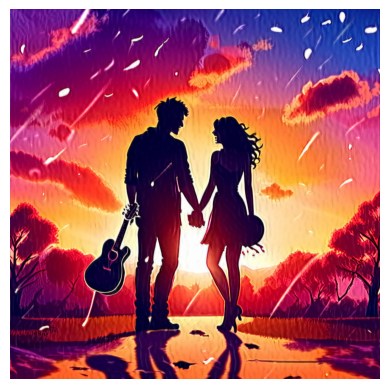

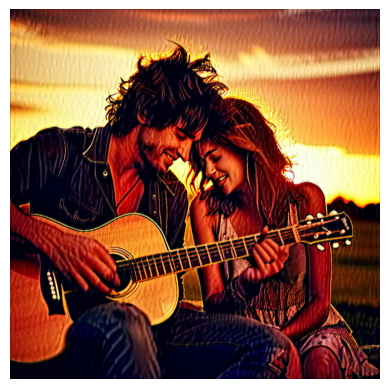

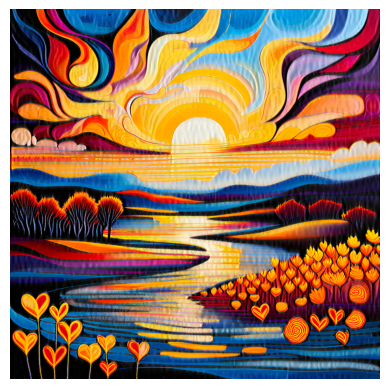

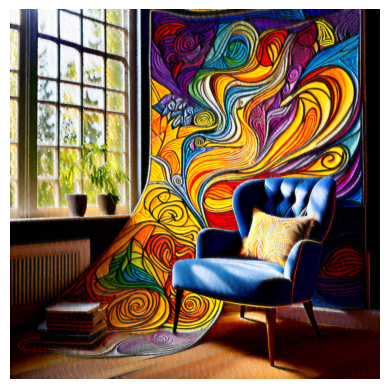

In [13]:
import matplotlib.pyplot as plt
from PIL import Image

result = {}
for music in input_list:
  result[music] = os.listdir(DATA_PATH + '.tmp/style_transfer/'+music)

for (music, pics) in zip(result.keys(), result.values()):
  print(music)
  for pic in pics:
    if pic.endswith('.png'):
      image = Image.open((DATA_PATH + '.tmp/style_transfer/'+music+'/'+pic))
      plt.imshow(image)
      plt.axis('off')
      plt.show()